In [ ]:
import numpy as np
from ansys.mapdl.core import launch_mapdl
import matplotlib.pyplot as plt
import time

class simulation_PyAPDL:
    def __init__(self, nproc=1,nerr = None):
        self.nproc = nproc
        if nerr is not None:
            self.nerr = nerr
    def launch_engine(self):
        start_t = time.time()
        self.mapdl = launch_mapdl(nproc=self.nproc)
        self.mapdl.nerr(self.nproc)
        self.FLAG_post = False
        self.FLAG_numvar = False
        end_t = time.time()
        print("Launch Pymapdl")
        print(f"     Launch Pymapdl successfully, duration {end_t - start_t:.4f} seconds.")
        self.mapdl.clear()

    def setting_parameter(self,
                bool_inner = True,
                bool_stair = True,
                bool_SSI   = True,
                elem_size  = 0.4,
                height     = 3.37,
                t_arr      = None,
                e_arr      = None,
                nu_arr     = None,
                rho_arr    = None,
                soil_arr   = None,
                bool_show_setting_info = True
                ):

        self.bool_inner = bool_inner 
        self.bool_stair = bool_stair 
        self.bool_SSI   = bool_SSI   
        self.elem_size  = elem_size  
        self.height     = height     
        self.t_arr      = t_arr      
        self.e_arr      = e_arr      
        self.nu_arr     = nu_arr     
        self.rho_arr    = rho_arr    
        self.soil_arr   = soil_arr   
        self.bool_show_setting_info = bool_show_setting_info

        if bool_show_setting_info:
            print(" Setting information")
            print("     Building inner wall           : " ,self.bool_inner )
            print("     Building stair                : " ,self.bool_stair ) 
            print("     Building SSI                  : " ,self.bool_SSI   ) 
            print("     Element size                  : " ,float(self.elem_size)) 
            print("     Height of building            : " ,float(self.height))
        
        self.n_storeys = 3
        print(" Assigning parameter")
        if self.t_arr is None:
            self.t_slab          = 0.468 
            self.t_corridor      = 0.8
            self.t_ground        = 0.05
            self.t_edge_wall     = 0.2
            self.t_inner_wall    = 0.2
            self.t_stair         = 0.468
            print("     Using default thickness")
        else:
            self.t_slab          = float(self.t_arr[0]) 
            self.t_corridor      = float(self.t_arr[1])
            self.t_ground        = float(self.t_arr[2])
            self.t_edge_wall     = float(self.t_arr[3])
            self.t_inner_wall    = float(self.t_arr[4])
            self.t_stair         = float(self.t_arr[5])
            print("     Rewrite thickness by input")


        # Young's modulus [N/m^2] -----------------------------------------------
        if self.e_arr is None:
            self.E_slab          = 30e9  
            self.E_corridor      = 30e9
            self.E_ground        = 30e9
            self.E_edge_wall     = 30e9
            self.E_inner_wall    = 30e9
            self.E_stair         = 30e9
            print("     Using default Young's modulus")
        else:
            self.E_slab          = float(self.e_arr[0])  
            self.E_corridor      = float(self.e_arr[1])
            self.E_ground        = float(self.e_arr[2])
            self.E_edge_wall     = float(self.e_arr[3])
            self.E_inner_wall    = float(self.e_arr[4])
            self.E_stair         = float(self.e_arr[5])
            print("     Rewrite Young's modulus by input")

        # Poisson's ratio [-] -----------------------------------------------
        if self.nu_arr is None:
            self.nu_slab         = 0.27  
            self.nu_corridor     = 0.27
            self.nu_ground       = 0.27
            self.nu_edge_wall    = 0.27
            self.nu_inner_wall   = 0.27
            self.nu_stair        = 0.27
            print("     Using default Poisson's ratio")
        else:
            self.nu_slab         = float(self.nu_arr[0])  
            self.nu_corridor     = float(self.nu_arr[1])
            self.nu_ground       = float(self.nu_arr[2])
            self.nu_edge_wall    = float(self.nu_arr[3])
            self.nu_inner_wall   = float(self.nu_arr[4])
            self.nu_stair        = float(self.nu_arr[5])      
            print("     Rewrite Poisson's ratio by input") 

        # Density [kg/m^3] -----------------------------------------------
        if self.rho_arr is None:
            self.rho_slab        = 2300  
            self.rho_corridor    = 2300 
            self.rho_ground      = 2300 
            self.rho_edge_wall   = 2300 
            self.rho_inner_wall  = 2300 
            self.rho_stair       = 2300
            print("     Using default Density")
        else:
            self.rho_slab        = float(self.rho_arr[0])
            self.rho_corridor    = float(self.rho_arr[1])
            self.rho_ground      = float(self.rho_arr[2])
            self.rho_edge_wall   = float(self.rho_arr[3])
            self.rho_inner_wall  = float(self.rho_arr[4])
            self.rho_stair       = float(self.rho_arr[5])   
            print("     Rewrite Density by input") 


        #-----------------------Soil properties------------------------#
        if self.soil_arr is None:
            self.Vs_soil         = 450          # Shear wave velocity [m/s]
            self.Rho_soil        = 2.3e3        # Soil density [kg/m^3]
            self.Nu_soil         = 0.33         # Soil Poisson's Ratio [-]
            print("     Using default soil properties")
        else:
            self.Vs_soil         = float(self.soil_arr[0])
            self.Rho_soil        = float(self.soil_arr[1])
            self.Nu_soil         = float(self.soil_arr[2])
            print("     Rewrite soil properties by input")


        self.L_f             = self.elem_size/2  # Foundation half-length [m]
        self.B_f             = self.elem_size/2  # Foundation half-width [m]
        self.coord_x = np.array([0.0000, 0.4400, 2.2100, 3.4100, 5.1800, 6.3800, 8.1500, 9.3500, 11.120, 12.320,
                                 14.092, 15.290, 17.060, 18.471, 17.584, 16.553, 15.799, 14.768, 14.014, 12.983,
                                 12.398, 12.229, 11.199, 10.444, 9.4140, 8.9870, 8.6590, 7.6290, 7.2020, 5.5550,
                                 4.4430, 3.1420, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.2600, 4.5900, 8.7900,
                                 4.5900, 4.5900, 4.5900, 4.5900, 4.5900, 2.9230, 2.9230, 1.4700, 1.4700, 2.3600,
                                 3.2600, 5.6620, 0.0000, 2.2100, 2.2100, 3.2600, 1.1500])
        self.coord_y = np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
                                 0.0000, 0.0000, 0.0000, 0.0000, 1.0970, 2.3730, 3.3060, 4.5820, 5.5150, 6.7910,
                                 7.5150, 7.7240, 9.0000, 9.9330, 11.209, 11.737, 12.142, 13.418, 13.946, 15.984,
                                 17.361, 18.970, 18.970, 16.120, 11.700, 10.450, 4.6000, 4.6000, 4.6000, 4.6000,
                                 5.8500, 8.1850, 9.6100, 10.860, 11.836, 13.870, 16.120, 16.120, 13.870, 10.450,
                                 9.3360, 8.9700, 13.870, 3.1000, 4.6000, 5.7500, 10.450])
        self.num_kp  = len(self.coord_x)

    def build_model(self):
        print(" /PREP7 activated")
        start_time = time.time()
        self.mapdl.prep7()
        # Specify the unit
        self.mapdl.units("SI") 

        # Create the keypoint first using the k() method (Equivalent APDL command: K)
        for i_storey in range(self.n_storeys+1):
            for i_kp in range(self.num_kp):
                n_kp = i_storey*self.num_kp +  i_kp + 1
                n_coor = i_kp
                x_kp = self.coord_x[n_coor]
                y_kp = self.coord_y[n_coor]
                self.mapdl.k(n_kp, x_kp, y_kp,i_storey*self.height)


        for i_storey in range(self.n_storeys-1):
            num_acc = ((self.n_storeys+1)*self.num_kp) + (i_storey*self.num_kp)
            self.mapdl.k( 1 + num_acc, 0.0000, 8.4500,11*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 2 + num_acc, 0.0000, 7.3750,11*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 3 + num_acc, 0.0000, 5.7500, 4*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 4 + num_acc, 0.0000, 4.6000, 4*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 5 + num_acc, 1.1500, 4.6000, 4*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 6 + num_acc, 1.9600, 4.6000,        0.0000 +(i_storey)*self.height)
            self.mapdl.k( 7 + num_acc, 1.9600, 5.7500,        0.0000 +(i_storey)*self.height)
            self.mapdl.k( 8 + num_acc, 1.1500, 5.7500, 4*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k( 9 + num_acc, 1.1500, 7.3750,11*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k(10 + num_acc, 1.1500, 8.4500,11*(self.height/18) +(i_storey)*self.height)
            self.mapdl.k(11 + num_acc, 1.1500, 10.450,        self.height +(i_storey)*self.height)
            self.mapdl.k(12 + num_acc, 3.2600, 5.7500,        0.0000 +(i_storey)*self.height)


        # Create the Area using the a() method (Equivalent APDL command: A)
        for i_storey in range(self.n_storeys+1):
            # AREA 1
            A_kp_1 = 34 + (i_storey*self.num_kp)
            A_kp_2 = 53 + (i_storey*self.num_kp)
            A_kp_3 = 49 + (i_storey*self.num_kp)
            A_kp_4 = 48 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            # AREA 2
            A_kp_1 = 31 + (i_storey*self.num_kp)
            A_kp_2 = 32 + (i_storey*self.num_kp)
            A_kp_3 = 33 + (i_storey*self.num_kp)
            A_kp_4 = 34 + (i_storey*self.num_kp)
            A_kp_5 = 48 + (i_storey*self.num_kp)
            A_kp_6 = 47 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
            #
            # AREA 3
            A_kp_1 = 30 + (i_storey*self.num_kp)
            A_kp_2 = 31 + (i_storey*self.num_kp)
            A_kp_3 = 47 + (i_storey*self.num_kp)
            A_kp_4 = 48 + (i_storey*self.num_kp)
            A_kp_5 = 49 + (i_storey*self.num_kp)
            A_kp_6 = 46 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
            #
            # AREA 4
            A_kp_1 = 21 + (i_storey*self.num_kp)
            A_kp_2 = 22 + (i_storey*self.num_kp)
            A_kp_3 = 23 + (i_storey*self.num_kp)
            A_kp_4 = 24 + (i_storey*self.num_kp)
            A_kp_5 = 25 + (i_storey*self.num_kp)
            A_kp_6 = 26 + (i_storey*self.num_kp)
            A_kp_7 = 52 + (i_storey*self.num_kp)
            A_kp_8 = 42 + (i_storey*self.num_kp)
            A_kp_9 = 41 + (i_storey*self.num_kp)
            A_kp_10= 39 + (i_storey*self.num_kp)
            A_kp_11= 40 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11)
            #
            # AREA 5
            A_kp_1 = 26 + (i_storey*self.num_kp)
            A_kp_2 = 27 + (i_storey*self.num_kp)
            A_kp_3 = 28 + (i_storey*self.num_kp)
            A_kp_4 = 29 + (i_storey*self.num_kp)
            A_kp_5 = 45 + (i_storey*self.num_kp)
            A_kp_6 = 44 + (i_storey*self.num_kp)
            A_kp_7 = 43 + (i_storey*self.num_kp)
            A_kp_8 = 42 + (i_storey*self.num_kp)
            A_kp_9 = 52 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9)
            #
            # AREA 6
            A_kp_1 = 10 + (i_storey*self.num_kp)
            A_kp_2 = 11 + (i_storey*self.num_kp)
            A_kp_3 = 12 + (i_storey*self.num_kp)
            A_kp_4 = 13 + (i_storey*self.num_kp)
            A_kp_5 = 14 + (i_storey*self.num_kp)
            A_kp_6 = 15 + (i_storey*self.num_kp)
            A_kp_7 = 16 + (i_storey*self.num_kp)
            A_kp_8 = 17 + (i_storey*self.num_kp)
            A_kp_9 = 18 + (i_storey*self.num_kp)
            A_kp_10= 19 + (i_storey*self.num_kp)
            A_kp_11= 20 + (i_storey*self.num_kp)
            A_kp_12= 21 + (i_storey*self.num_kp)
            A_kp_13= 40 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
            #
            # AREA 7 
            A_kp_1 = 3 + (i_storey*self.num_kp)
            A_kp_2 = 4 + (i_storey*self.num_kp)
            A_kp_3 = 5 + (i_storey*self.num_kp)
            A_kp_4 = 6 + (i_storey*self.num_kp)
            A_kp_5 = 7 + (i_storey*self.num_kp)
            A_kp_6 = 8 + (i_storey*self.num_kp)
            A_kp_7 = 9 + (i_storey*self.num_kp)
            A_kp_8 = 10 + (i_storey*self.num_kp)
            A_kp_9 = 40 + (i_storey*self.num_kp)
            A_kp_10= 39 + (i_storey*self.num_kp)
            A_kp_11= 38 + (i_storey*self.num_kp)
            A_kp_12= 55 + (i_storey*self.num_kp)
            A_kp_13= 54 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
            #
            # AREA 8
            A_kp_1 = 1 + (i_storey*self.num_kp)
            A_kp_2 = 2 + (i_storey*self.num_kp)
            A_kp_3 = 3 + (i_storey*self.num_kp)
            A_kp_4 = 54+ (i_storey*self.num_kp)
            A_kp_5 = 55+ (i_storey*self.num_kp)
            A_kp_6 = 37+ (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
            #
            # AREA 9 
            A_kp_1 = 37 + (i_storey*self.num_kp)
            A_kp_14 =55 + (i_storey*self.num_kp)
            A_kp_2 = 38 + (i_storey*self.num_kp)
            A_kp_3 = 56 + (i_storey*self.num_kp)
            A_kp_4 = 41 + (i_storey*self.num_kp)
            A_kp_5 = 42 + (i_storey*self.num_kp)
            A_kp_6 = 43 + (i_storey*self.num_kp)
            A_kp_7 = 44 + (i_storey*self.num_kp)
            A_kp_8 = 45 + (i_storey*self.num_kp)
            A_kp_9 = 46 + (i_storey*self.num_kp)
            A_kp_10= 49 + (i_storey*self.num_kp)
            A_kp_11= 53 + (i_storey*self.num_kp)
            A_kp_12= 35 + (i_storey*self.num_kp)
            A_kp_13= 36 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_14, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
            #
            # AREA 10
            A_kp_1 = 38 + (i_storey*self.num_kp)
            A_kp_2 = 39 + (i_storey*self.num_kp)
            A_kp_3 = 41 + (i_storey*self.num_kp)
            A_kp_4 = 56 + (i_storey*self.num_kp)
            self.mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            # AREA 11
            if i_storey <self.n_storeys and i_storey != 0:
                A_kp_1 = 37 + (i_storey*self.num_kp)
                A_kp_2 = 55 + (i_storey*self.num_kp)
                A_kp_3 = 38 + (i_storey*self.num_kp)
                A_kp_4 = 56 + (i_storey*self.num_kp)
                A_kp_5 = 51 + (i_storey*self.num_kp)
                A_kp_6 = 50 + (i_storey*self.num_kp)
                A_kp_7 = 57 + (i_storey*self.num_kp)
                A_kp_8 = 36 + (i_storey*self.num_kp)
                self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8)


        num_count = (self.n_storeys*self.num_kp)
        self.mapdl.a( 29+num_count, 30+num_count, 46+num_count, 45+num_count)
        #
        # self.boolean the area using the asba() method (Equivalent APDL command: ASBA)
        aout1 = self.mapdl.asba(19, 21)
        aout2 = self.mapdl.asba(30, 32)



        # Select the area using the asel() method (Equivalent APDL command: ASEL)
        self.mapdl.asel('ALL')
        self.mapdl.asel('S', 'AREA', '', 44)
        self.mapdl.asel('A', 'AREA', '', 19)
        self.mapdl.asel('A', 'AREA', '', 41)
        self.mapdl.asel('A', 'AREA', '', 42)
        self.mapdl.asel('A', 'AREA', '', 31)
        self.mapdl.asel('A', 'AREA', '', 20)
        self.mapdl.cm('corridor_floor', 'AREA')
        #self.mapdl.aplot(show_area_numbering=True, color_areas=True)
        #self.mapdl.asel('S', 'AREA', '', 'corridor_floor')
        self.mapdl.asel('ALL')






        for i_storey in range(1,self.n_storeys+1):
            kp_id_2 = 14
            for i_kp in range(1,kp_id_2+1):
                if i_kp % 2 != 0:
                    A_kp_1 = i_kp + ((i_storey-1)*self.num_kp)
                    A_kp_2 = i_kp + 1 + ((i_storey-1)*self.num_kp)
                    A_kp_3 = i_kp + 1 + ((i_storey)*self.num_kp)
                    A_kp_4 = i_kp + ((i_storey)*self.num_kp)
                    self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)

            kp_id_3 = 21
            for i_kp in range(kp_id_2,kp_id_3+1):
                if i_kp % 2 == 0:
                        A_kp_1 = i_kp + ((i_storey-1)*self.num_kp)
                        A_kp_2 = i_kp + 1 + ((i_storey-1)*self.num_kp)
                        A_kp_3 = i_kp + 1 + ((i_storey)*self.num_kp)
                        A_kp_4 = i_kp + ((i_storey)*self.num_kp)
                        self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            kp_id_4 = 26
            for i_kp in range(kp_id_3,kp_id_4+1):
                if i_kp % 2 != 0:
                        A_kp_1 = i_kp + ((i_storey-1)*self.num_kp)
                        A_kp_2 = i_kp + 1 + ((i_storey-1)*self.num_kp)
                        A_kp_3 = i_kp + 1 + ((i_storey)*self.num_kp)
                        A_kp_4 = i_kp + ((i_storey)*self.num_kp)
                        self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            kp_id_5 = 29
            for i_kp in range(kp_id_4,kp_id_5+1):
                if i_kp % 2 == 0:
                        A_kp_1 = i_kp + ((i_storey-1)*self.num_kp)
                        A_kp_2 = i_kp + 1 + ((i_storey-1)*self.num_kp)
                        A_kp_3 = i_kp + 1 + ((i_storey)*self.num_kp)
                        A_kp_4 = i_kp + ((i_storey)*self.num_kp)
                        self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            # Wall without window
            #
            for i_kp in range(30,34):
                A_kp_1 = i_kp + ((i_storey-1)*self.num_kp)
                A_kp_2 = i_kp + 1 + ((i_storey-1)*self.num_kp)
                A_kp_3 = i_kp + 1 + ((i_storey)*self.num_kp)
                A_kp_4 = i_kp + ((i_storey)*self.num_kp)
                self.mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
            #
            # Aufzug
            #
            if i_storey != 1:
                self.mapdl.a( 29+ ((i_storey-1)*self.num_kp), 30+ ((i_storey-1)*self.num_kp), 30+ ((i_storey)*self.num_kp), 29+ ((i_storey)*self.num_kp))
            #
            self.mapdl.a( 34 + ((i_storey-1)*self.num_kp), 53 + ((i_storey-1)*self.num_kp), 53+ ((i_storey)*self.num_kp), 34+ ((i_storey)*self.num_kp))
            self.mapdl.a( 53 + ((i_storey-1)*self.num_kp), 35 + ((i_storey-1)*self.num_kp), 35+ ((i_storey)*self.num_kp), 53+ ((i_storey)*self.num_kp))
            self.mapdl.a( 36 + ((i_storey-1)*self.num_kp), 37 + ((i_storey-1)*self.num_kp), 37+ ((i_storey)*self.num_kp), 36+ ((i_storey)*self.num_kp))
            self.mapdl.a( 37 + ((i_storey-1)*self.num_kp),  1 + ((i_storey-1)*self.num_kp),  1+ ((i_storey)*self.num_kp), 37+ ((i_storey)*self.num_kp))
            #


        # Create the group of selected items using the cm() method (Equivalent APDL command: CM)
        self.mapdl.cm('outside_wall', 'AREA')

        if self.bool_inner and self.bool_stair:
            for i_storey in range(self.n_storeys-1):
                #
                num_acc = ((self.n_storeys+1)*self.num_kp) + (i_storey*self.num_kp)
                #
                self.mapdl.a( 36 +  ((i_storey+1)*self.num_kp), 1 + num_acc , 10 + num_acc , 57+((i_storey+1)*self.num_kp) )
                self.mapdl.a(  1 +                num_acc, 2 + num_acc ,  9 + num_acc , 10 + num_acc)
                self.mapdl.a(  2 +                num_acc, 3 + num_acc ,  8 + num_acc ,  9 + num_acc)
                self.mapdl.a(  3 +                num_acc, 4 + num_acc ,  5 + num_acc ,  8 + num_acc)
                self.mapdl.a(  5 +                num_acc, 6 + num_acc ,  7 + num_acc ,  8 + num_acc)
                self.mapdl.a(  6+num_acc    , 38+((i_storey)*self.num_kp),  12 + num_acc, 7 + num_acc)
            self.mapdl.asba(9,121,'','DELETE','KEEP')
            # Merges coincident or equivalently defined items using the nummrg() method (Equivalent APDL command: NUMMRG)
            self.mapdl.nummrg('kp')   



        if self.bool_inner:
            for i_storey in range(self.n_storeys):
                # Treppen Haus
                self.mapdl.a(37+(i_storey*self.num_kp), 38+(i_storey*self.num_kp), 38+((i_storey+1)*self.num_kp), 37+((i_storey+1)*self.num_kp))
                # Aufzug
                self.mapdl.a(45+(i_storey*self.num_kp), 29+(i_storey*self.num_kp), 29+((i_storey+1)*self.num_kp), 45+((i_storey+1)*self.num_kp))
                self.mapdl.a(46+(i_storey*self.num_kp), 30+(i_storey*self.num_kp), 30+((i_storey+1)*self.num_kp), 46+((i_storey+1)*self.num_kp))
                # Teekueche 
                self.mapdl.a(47+(i_storey*self.num_kp), 31+(i_storey*self.num_kp), 31+((i_storey+1)*self.num_kp), 47+((i_storey+1)*self.num_kp))
                # Technik
                self.mapdl.a(49+(i_storey*self.num_kp), 48+(i_storey*self.num_kp), 48+((i_storey+1)*self.num_kp), 49+((i_storey+1)*self.num_kp))
                self.mapdl.a(48+(i_storey*self.num_kp), 34+(i_storey*self.num_kp), 34+((i_storey+1)*self.num_kp), 48+((i_storey+1)*self.num_kp))
                #
            #
            # EG config
            #
            #A, 38, 39, 39+(1*self.num_kp), 38+(1*self.num_kp)
            self.mapdl.a( 41, 42, 42+(1*self.num_kp), 41+(1*self.num_kp))
            self.mapdl.a( 52, 26, 26+(1*self.num_kp), 52+(1*self.num_kp))
            self.mapdl.lsel('NONE')
            self.mapdl.l(39, 39+(1*self.num_kp))# BEAM elemetn (only this one)   
            self.mapdl.cm('column_eg', 'LINE')
            self.mapdl.lsel('ALL')
            #
            # 1 OG config
            #
            #self.mapdl.a( 39+(1*self.num_kp), 40+(1*self.num_kp), 40+(2*self.num_kp), 39+(2*self.num_kp))
            #self.mapdl.a( 40+(1*self.num_kp), 21+(1*self.num_kp), 21+(2*self.num_kp), 40+(2*self.num_kp))
            #self.mapdl.a( 40+(1*self.num_kp), 10+(1*self.num_kp), 10+(2*self.num_kp), 40+(2*self.num_kp))
            #self.mapdl.a(  3+(1*self.num_kp), 54+(1*self.num_kp), 54+(2*self.num_kp),  3+(2*self.num_kp))
            #
            # 1, 2 OG config
            #
            for i_storey in range(1,self.n_storeys):
                self.mapdl.a( 41+(i_storey*self.num_kp), 42+(i_storey*self.num_kp), 42+((i_storey+1)*self.num_kp), 41+((i_storey+1)*self.num_kp))
                self.mapdl.a( 42+(i_storey*self.num_kp), 43+(i_storey*self.num_kp), 43+((i_storey+1)*self.num_kp), 42+((i_storey+1)*self.num_kp))
                self.mapdl.a( 44+(i_storey*self.num_kp), 45+(i_storey*self.num_kp), 45+((i_storey+1)*self.num_kp), 44+((i_storey+1)*self.num_kp))
            #
            # 2 OG config
            #
            self.mapdl.a( 38+(2*self.num_kp), 39+(2*self.num_kp), 39+(3*self.num_kp), 38+(3*self.num_kp))





        #************************* Creating group for element assignemnt **************************#
        #
        #
        # Group floor slab id-----------------------------------------------
        self.mapdl.asel('NONE')
        for i_storey in range(1, self.n_storeys+1):
            self.mapdl.asel('A','LOC','Z',i_storey*self.height)
                    
        self.mapdl.asel('U','AREA','','corridor_floor')    # Delete unnecessary wall which is selected auto.
        self.mapdl.asel('U','LOC','Y', (5.75+4.6)/2)
        self.mapdl.cm('slab_floor','AREA')
        self.mapdl.asel('ALL')
        #
        #
        # Group floor Ground id-----------------------------------------------
        self.mapdl.asel('ALL')
        self.mapdl.asel('S','LOC','Z',0)
        self.mapdl.cm('ground_floor','AREA')
        self.mapdl.asel('ALL')
        #
        #
        # Group Edge of building id-----------------------------------------------
        self.mapdl.asel('S','AREA','','outside_wall ')
        self.mapdl.asel('U','AREA','','slab_floor')
        self.mapdl.asel('U','AREA','','ground_floor')
        self.mapdl.asel('U','AREA','','corridor_floor ')
        self.mapdl.cm('outside_wall','AREA')
        self.mapdl.asel('ALL')
        #
        #
        # Group Inner wall id-----------------------------------------------
        if self.bool_inner:
            self.mapdl.asel('NONE')
            for i_storey in range(self.n_storeys):
                self.mapdl.asel('A','LOC','Z', i_storey*self.height + (self.height)/2)
            self.mapdl.asel('U','AREA','','outside_wall') 
            self.mapdl.cm('inner_wall','AREA')
            self.mapdl.asel('ALL')
            #
            # Group Stairs id-----------------------------------------------
            if self.bool_stair:
                self.mapdl.asel('S','LOC','X', 1.15/2)
                self.mapdl.asel('A','LOC','Y', (5.75+4.6)/2)
                self.mapdl.asel('U','AREA','','corridor_floor')
                self.mapdl.asel('U','AREA','',121)
                self.mapdl.asel('U','AREA','',10)
                self.mapdl.cm('stair_floor','AREA')
                self.mapdl.asel('ALL')



        #*************************** Material properties ***************************#
        # Define the Material properties  (Equivalent APDL command: ET/ SECTYPE/ SECDATA/ MP/ AATT)
        self.mapdl.et(1, "SHELL181 ")
        self.mapdl.sectype(1,'SHELL')
        self.mapdl.secdata(self.t_slab)
        self.mapdl.mp('EX',1,self.E_slab)
        self.mapdl.mp('PRXY',1,self.nu_slab)
        self.mapdl.mp('DENS',1,self.rho_slab)
        self.mapdl.asel('S','AREA','','slab_floor')
        self.mapdl.aatt(1,0,1,'',1)
        self.mapdl.asel('ALL')

        self.mapdl.et(2, "SHELL181 ")
        self.mapdl.sectype(2,'SHELL')
        self.mapdl.secdata(self.t_corridor)
        self.mapdl.mp('EX',2,self.E_corridor)
        self.mapdl.mp('PRXY',2,self.nu_corridor)
        self.mapdl.mp('DENS',2,self.rho_corridor)
        self.mapdl.asel('S','AREA','','corridor_floor')
        self.mapdl.aatt(2,0,2,'',2)
        self.mapdl.asel('ALL')

        self.mapdl.et(3, "SHELL181 ")
        self.mapdl.sectype(3,'SHELL')
        self.mapdl.secdata(self.t_ground)
        self.mapdl.mp('EX',3,self.E_ground)
        self.mapdl.mp('PRXY',3,self.nu_ground)
        self.mapdl.mp('DENS',3,self.rho_ground)
        self.mapdl.asel('S','AREA','','ground_floor')
        self.mapdl.aatt(3,0,3,'',3)
        self.mapdl.asel('ALL')

        self.mapdl.et(4,"SHELL181 ")
        self.mapdl.sectype(4,'SHELL')
        self.mapdl.secdata(self.t_edge_wall)
        self.mapdl.mp('EX',4,self.E_edge_wall)
        self.mapdl.mp('PRXY',4,self.nu_edge_wall)
        self.mapdl.mp('DENS',4,self.rho_edge_wall)
        self.mapdl.asel('S','AREA','','outside_wall')
        self.mapdl.aatt(4,0,4,'',4)
        self.mapdl.asel('ALL')

        if self.bool_inner:
            self.mapdl.et(5,"SHELL181 ")
            self.mapdl.sectype(5,'SHELL')
            self.mapdl.secdata(self.t_inner_wall)
            self.mapdl.mp('EX',5,self.E_inner_wall)
            self.mapdl.mp('PRXY',5,self.nu_inner_wall)
            self.mapdl.mp('DENS',5,self.rho_inner_wall)
            self.mapdl.asel('S','AREA','','inner_wall')
            self.mapdl.aatt(5,0,5,'',5)
            self.mapdl.asel('ALL')

            if self.bool_stair:
                self.mapdl.et(6,"SHELL181 ")
                self.mapdl.sectype(6,'SHELL')
                self.mapdl.secdata(self.t_stair)
                self.mapdl.mp('EX',6,self.E_stair)
                self.mapdl.mp('PRXY',6,self.nu_stair)
                self.mapdl.mp('DENS',6,self.rho_stair)
                self.mapdl.asel('S','AREA','','stair_floor')
                self.mapdl.aatt(6,0,6,'',6)
                self.mapdl.asel('ALL')
            
            # WARNING!!! The latt command in PyAPDL and APDL are different!
            # In APDL,   Associates element attributes with the selected, unmeshed lines using LATT,7,0,7,-,-,-,7 -> 7 parameter to define
            # In PyAPDL, Associates element attributes with the selected, unmeshed lines using latt(7,0,7,'','',7)-> 6 parameter to define
            self.mapdl.et(7,"BEAM189")
            self.mapdl.sectype(7,'BEAM','RECT')
            self.mapdl.secoffset('CENT')
            self.mapdl.secdata(self.t_inner_wall,self.t_inner_wall)
            self.mapdl.mp('EX',7,self.E_inner_wall)
            self.mapdl.mp('PRXY',7,self.nu_inner_wall)
            self.mapdl.mp('DENS',7,self.rho_inner_wall)
            self.mapdl.lsel('S','LINE','','column_eg')
            self.mapdl.latt(7,0,7,'','',7)
            self.mapdl.lsel('ALL')


        # Meshing
        self.mapdl.lesize('ALL',self.elem_size)
        self.mapdl.aesize('ALL',self.elem_size)
        self.mapdl.amesh('ground_floor')
        self.mapdl.nsel('S','LOC','Z',0)
        self.mapdl.cm('ground_node','NODE')
        self.mapdl.nsel('ALL')

        if self.bool_SSI:
            #*************************** Define SSI properties ***************************##
            #   
            L1              =(4*self.L_f*self.B_f/3.14159)**0.5 	#sqrt(A_f/pi)[m]  #(from luco and wang, 1978)
            G               =(self.Vs_soil**2)*(self.Rho_soil)
            #
            #Parameters defined from Wolf,1997
            K_hor           = 8*G*L1/(2-self.Nu_soil)
            K_vert          = 4*G*L1/(1-self.Nu_soil)
            K_rock          = 8*G*(L1**3)/(3*(1-self.Nu_soil))
            K_tors          = 16*G*(L1**3)/3
            #
            #
            #Lumped Mass coefficient [kg] 
            M_Z             =((L1**2)/(self.Vs_soil**2))*0.27*K_vert	
            M_Y             =((L1**2)/(self.Vs_soil**2))*0.095*K_hor
            M_X             =((L1**2)/(self.Vs_soil**2))*0.095*K_hor
            Ix              = ((L1**2)/(self.Vs_soil**2))*0.24*K_rock	
            Iy              = ((L1**2)/(self.Vs_soil**2))*0.24*K_rock
            Iz              = ((L1**2)/(self.Vs_soil**2))*0.045*K_tors
            gamma_C_rock    = 0.3 / ( 1+ ((3*(1-self.Nu_soil)*Ix)/(8*L1**5*self.Rho_soil)) )
            gamma_C_tors    =(0.433/(1+((2*Iz)/(L1**5*self.Rho_soil))))*((Iz)/(L1**5*self.Rho_soil))**(0.5)
            C_hor           = L1*0.58*K_hor / self.Vs_soil
            C_vert          = L1*0.85*K_vert / self.Vs_soil
            C_rock          = L1*gamma_C_rock*K_rock/self.Vs_soil
            C_tors          = L1*gamma_C_tors*K_tors/self.Vs_soil
            #
            #
            #-Stiffness-------------------------
            Ka_11           = K_hor	
            Ka_22           = K_hor
            Ka_33           = K_vert					
            Ka_44           = K_rock		
            Ka_55           = K_rock	
            Ka_66           = K_tors
            Ka_15           = 0	
            Ka_24           = 0			
            #	
            #-damping--------------------------- 
            Ca_11           = C_hor	
            Ca_22           = C_hor
            Ca_33           = C_vert		
            Ca_44           = C_rock		
            Ca_55           = C_rock	
            Ca_66           = C_tors
            Ca_15           = 0
            Ca_24           = 0
            #
            #
            #
            self.mapdl.et(8, "MASS21", kop3=0)
            self.mapdl.type(8)
            self.mapdl.real(8)
            self.mapdl.r(8,M_X,M_Y,M_Z,Ix,Iy,Iz)
            #
            self.mapdl.et(9, "MATRIX27", kop1 = 1, kop2 = 0, kop3=4, kop4 = 1)
            self.mapdl.r(9,Ka_11,0,0,0,Ka_15,0)
            self.mapdl.rmore(-Ka_11,0,0,0,-Ka_15,0      )       # C7 to C12
            self.mapdl.rmore(Ka_22,0,Ka_24,0,0,0        )       # C13 to 18
            self.mapdl.rmore(-Ka_22,0,-Ka_24,0,0,Ka_33  )      	# C19 to 24
            self.mapdl.rmore(0,0,0,0,0,-Ka_33           )       # C25 to 30
            self.mapdl.rmore(0,0,0,Ka_44,0,0            )		# C31 to 36
            self.mapdl.rmore(0,-Ka_24,0,-Ka_44,0,0      )       # C37 to 42
            self.mapdl.rmore(Ka_55,0,-Ka_15,0,0,0       )       # C43 to 48
            self.mapdl.rmore(-Ka_55,0,Ka_66,0,0,0       )  		# C49 to 54
            self.mapdl.rmore(0,0,-Ka_66,Ka_11,0,0       )   	   # C55 to 60
            self.mapdl.rmore(0,Ka_15,0,Ka_22,0,Ka_24    )      	# C61 to 66
            self.mapdl.rmore(0,0,Ka_33,0,0,0 		   )		# C6_7 to 72
            self.mapdl.rmore(Ka_44,0,0,Ka_55,0,Ka_66    )      	# C73 to 78
            #
            self.mapdl.et(10, "MATRIX27", kop1 = 1, kop2 = 0, kop3=5, kop4 = 1)
            self.mapdl.r(10,Ca_11,0,0,0,Ca_15,0)           # C1 to C6
            self.mapdl.rmore(-Ca_11,0,0,0,-Ca_15,0)        # C7 to C12
            self.mapdl.rmore(Ca_22,0,Ca_24,0,0,0)          # C13 to 18
            self.mapdl.rmore(-Ca_22,0,-Ca_24,0,0,Ca_33)    # C19 to 24
            self.mapdl.rmore(0,0,0,0,0,-Ca_33)             # C25 to 30
            self.mapdl.rmore(0,0,0,Ca_44,0,0)              # C31 to 36
            self.mapdl.rmore(0,-Ca_24,0,-Ca_44,0,0)        # C37 to 42
            self.mapdl.rmore(Ca_55,0,-Ca_15,0,0,0)         # C43 to 48
            self.mapdl.rmore(-Ca_55,0,Ca_66,0,0,0)         # C49 to 54
            self.mapdl.rmore(0,0,-Ca_66,Ca_11,0,0)         # C55 to 60
            self.mapdl.rmore(0,Ca_15,0,Ca_22,0,Ca_24)      # C61 to 66
            self.mapdl.rmore(0,0,Ca_33,0,0,0)              # C67 to 72
            self.mapdl.rmore(Ca_44,0,0,Ca_55,0,Ca_66)      # C73 to 78
            #
            #
            n_count = self.mapdl.nsel('S','NODE','','ground_node')
            self.mapdl.ngen(2,len(n_count),'ground_node','','',0,0,-self.elem_size)
            self.mapdl.nsel('ALL')
            self.mapdl.nsel('S','LOC','Z',-self.elem_size)
            self.mapdl.cm('foundation_node','NODE')
            self.mapdl.nsel('ALL')
            self.mapdl.nummrg('NODE')
            #
            self.mapdl.knode('','ground_node')
            self.mapdl.nummrg('kp')
            self.mapdl.cmsel('ALL')
            self.mapdl.ksel('S','LOC','Z',0)
            self.mapdl.cm('ground_kp','KP')
            self.mapdl.cmsel('ALL')
            #
            self.mapdl.ksel('S','KP','','ground_kp')
            self.mapdl.katt(0,8,8)
            self.mapdl.ksel('ALL')
            #
            self.mapdl.nsel('ALL')
            self.mapdl.type(9)
            self.mapdl.real(9)
            self.mapdl.eintf('','','LOW',0,0,0,-self.elem_size,0)
            #
            self.mapdl.nsel('ALL')
            self.mapdl.type(10)
            self.mapdl.real(10)
            self.mapdl.eintf('','','LOW',0,0,0,-self.elem_size,0)
            self.mapdl.nsel('ALL')

        self.mapdl.asel('ALL')
        self.mapdl.asel('U','AREA','','ground_floor')
        self.mapdl.cm('area_remained','AREA')
        self.mapdl.asel('ALL')
        self.mapdl.amesh('area_remained')
        #
        if self.bool_inner:
            self.mapdl.lmesh('column_eg')
        #
        if self.bool_SSI:
            self.mapdl.kmesh('ground_kp')
        #
        self.mapdl.nsel('ALL')
        self.mapdl.esel('ALL')
        self.mapdl.ksel('ALL')
        self.mapdl.nummrg('ELEM')
        self.mapdl.nummrg('NODE')
        self.mapdl.nsel('ALL')
        self.FLAG_post = False


        # Start the SOLUTION
        # If you find your simultion is terminated with no reason, then check the error files: file0.err, 
        # sometimes it won't return the error message directly in python's command window.
        #
        prep_time = time.time()
        print(f"     /PREP7 finished, duration {prep_time - start_time:.4f} seconds.")
    
    def solve_model(self,
            Solu_type  = 3,
            Star_Freq  = 0.001,
            End_Freq   = 50,
            Freq_Incr  = 0.5,
            N_modes    = 40,
            Damping_ratio = 0.05,
            excitation_node = None):
        self.Solu_type     = Solu_type    
        self.Star_Freq     = Star_Freq    
        self.End_Freq      = End_Freq     
        self.Freq_Incr     = Freq_Incr    
        self.N_modes       = N_modes      
        self.Damping_ratio = Damping_ratio

        print("Solve model: /SOLU")
        start_time = time.time()
        if self.bool_show_setting_info:
            print(" Setting information")
            print("     Solution type                 : " ,self.Solu_type  )
            print("     Start frequency               : " ,self.Star_Freq  )
            print("     End frequency                 : " ,self.End_Freq   )
            print("     Freqency increment            : " ,self.Freq_Incr  )
            print("     Number of modes (solu_type=2) : " ,self.N_modes    )
            print("     Damping ratio                 : " ,self.Damping_ratio)

        if self.Solu_type == 5 or self.Solu_type == 6:
            if excitation_node is None:
                print("ERROR, you must need to define the excitation node for Solu_type = 4 or 5 ")
                return
            else:
                self.excitation_node = excitation_node
                print("     Excitation node               : " ,self.excitation_node  )

        self.mapdl.run("/SOLU")
        if self.Solu_type == 2:
            self.mapdl.antype(2)  
            self.mapdl.modopt('LANB',self.N_modes,self.Star_Freq,self.End_Freq,'','OFF' )
            self.mapdl.dmprat(self.Damping_ratio)
            if self.bool_SSI:
                self.mapdl.nsel('S','NODE','','foundation_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.kbc(1)
                self.mapdl.nsel('ALL')
            else:
                self.mapdl.nsel('S','NODE','','ground_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.kbc(1)
                self.mapdl.nsel('ALL')
            self.mapdl.allsel()
            self.mapdl.solve()

        elif self.Solu_type == 3:
            freq = np.array([0,self.End_Freq])
            U_input = np.array([1,1])
            U_signal = np.column_stack((freq, U_input))
            self.mapdl.load_table("Impulse_disp", U_signal ,"FREQ")
            self.mapdl.antype(3)
            self.mapdl.eqslv('SPARSE')
            self.mapdl.hropt('AUTO')
            self.mapdl.outres("ALL","ALL")	
            self.mapdl.outres("NSOL","1")
            self.mapdl.outres("ESOL")
            self.mapdl.outres("RSOL")
            #
            #
            self.mapdl.nsel("ALL")
            #
            # As the warning message returned, DMPART command might not be valided in new version of ANSYS, current version is 2021 R2.
            # This command will be removed in the furture, still try to find better way to define the damping ratio
            self.mapdl.dmprat(self.Damping_ratio)			  
            #
            N_freq = ((self.End_Freq-self.Star_Freq) /self.Freq_Incr)+1
            self.mapdl.harfrq(self.Star_Freq,self.End_Freq)
            self.mapdl.nsubst(N_freq,5*N_freq,0.75*N_freq)
            #
            # d() method to define base excitation. 
            # If your loading is force instead of displacement or acc, then you can use Modal-Superposition 
            if self.bool_SSI:
                self.mapdl.nsel('S','NODE','','foundation_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",1)
                self.mapdl.d("ALL","UY",1)
                self.mapdl.d("ALL","UZ",1)
                self.mapdl.kbc(1)
                self.mapdl.nsel('ALL')
            else:
                self.mapdl.nsel('S','NODE','','ground_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",1)
                self.mapdl.d("ALL","UY",1)
                self.mapdl.d("ALL","UZ",1)
                self.mapdl.kbc(1)
                self.mapdl.nsel('ALL')
            self.mapdl.allsel()
            self.mapdl.solve()


        elif self.Solu_type == 5:
            freq = np.array([0,self.End_Freq])
            U_input = np.array([1,1])
            U_signal = np.column_stack((freq, U_input))
            self.mapdl.load_table("Impulse_disp", U_signal ,"FREQ")
            self.mapdl.antype(3)
            self.mapdl.eqslv('SPARSE')
            self.mapdl.hropt('AUTO')
            self.mapdl.outres("ALL","ALL")	
            self.mapdl.outres("NSOL","1")
            self.mapdl.outres("ESOL")
            self.mapdl.outres("RSOL")
            #
            #
            self.mapdl.nsel("ALL")
            self.mapdl.dmprat(self.Damping_ratio)			  
            #
            N_freq = ((self.End_Freq-self.Star_Freq) /self.Freq_Incr)+1
            self.mapdl.harfrq(self.Star_Freq,self.End_Freq)
            self.mapdl.nsubst(N_freq,5*N_freq,0.75*N_freq)
            #
            if self.bool_SSI:
                self.mapdl.nsel('S','NODE','','foundation_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            else:
                self.mapdl.nsel('S','NODE','','ground_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            #
            #self.mapdl.f(self.excitation_node,"FX",-1)
            #self.mapdl.f(self.excitation_node,"FY",-1)
            self.mapdl.f(self.excitation_node,"FZ",-1)
            self.mapdl.kbc(1)
            self.mapdl.nsel('ALL')
            self.mapdl.allsel()
            self.mapdl.solve()
            self.mapdl.finish()


        elif self.Solu_type == 6:
            print("Using Modal-superpostion method")
            self.mapdl.antype(2)
            self.mapdl.modopt('LANB',self.N_modes,self.Star_Freq,self.End_Freq)
            self.mapdl.mxpand('ALL','','','YES','','YES')
            self.mapdl.outpr('ALL')
            self.mapdl.outres("ALL","ALL")	
            self.mapdl.outres("NSOL","1")	
            if self.bool_SSI:
                self.mapdl.nsel('S','NODE','','foundation_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            else:
                self.mapdl.nsel('S','NODE','','ground_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            self.mapdl.allsel()
            self.mapdl.solve()
            self.mapdl.finish()
            #
            self.mapdl.run("/SOLU")
            self.mapdl.antype(3)
            self.mapdl.hropt('MSUP')
            N_freq = ((self.End_Freq-self.Star_Freq) /self.Freq_Incr)+1
            self.mapdl.harfrq(self.Star_Freq,self.End_Freq)
            self.mapdl.nsubst(N_freq,5*N_freq,0.75*N_freq)
            self.mapdl.nsel("ALL")
            self.mapdl.dmprat(self.Damping_ratio)	
            if self.bool_SSI:
                self.mapdl.nsel('S','NODE','','foundation_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            else:
                self.mapdl.nsel('S','NODE','','ground_node')
                self.mapdl.d("ALL","ROTX",0)
                self.mapdl.d("ALL","ROTY",0)
                self.mapdl.d("ALL","ROTZ",0)
                self.mapdl.d("ALL","UX",0)
                self.mapdl.d("ALL","UY",0)
                self.mapdl.d("ALL","UZ",0)
                self.mapdl.nsel('ALL')
            #
            #self.mapdl.f(self.excitation_node,"FX",-1)
            #self.mapdl.f(self.excitation_node,"FY",-1)
            self.mapdl.f(self.excitation_node,"FZ",-1)
            self.mapdl.kbc(1)
            self.mapdl.nsel('ALL')
            self.mapdl.solve()
            self.mapdl.finish()
            #
            self.mapdl.run("/SOLU")
            self.mapdl.allsel()
            self.mapdl.expass("ON")
            self.mapdl.numexp("ALL")
            self.mapdl.solve()
            self.mapdl.finish()
    
        solu_time = time.time()
        print(f"     /SOLU finished, duration {solu_time - start_time:.4f} seconds.")
        
    def get_node_num(self,loc_x,loc_y,loc_z):
        return self.mapdl.queries.node(loc_x,loc_y,loc_z)
    

    def get_node_disp(self, var_id = 2, node_id = 1, direction = 'X', var_name = 'disp1'):
        if not self.FLAG_post:
            # Start the post26
            self.mapdl.post26()
            #numvar(): this increase the number of vars that can be allocated. 
            if not self.FLAG_numvar:
                self.mapdl.numvar(200)
                self.FLAG_numvar = True
            self.FLAG_post = True
            
        if var_id == 1:
            print("ERROR! var_id cannot be 1, please input the number larger than 1")
            return
    
        freq_values = np.unique(self.mapdl.post_processing.frequency_values)
        self.mapdl.nsol(var_id , node_id , 'U', direction,  var_name)
        r_name = var_name + '_R'
        i_name = var_name + '_I'
        self.mapdl.vget(r_name, var_id, '', 0)
        self.mapdl.vget(i_name, var_id, '', 1)
        real_part = self.mapdl.parameters[r_name]
        imag_part = self.mapdl.parameters[i_name]
        sol = {
            'freq':freq_values,
            'real':real_part,
            'imag':imag_part,
            'ampl':np.sqrt(np.power(real_part,2)+np.power(imag_part,2))
            }
        return sol
        

    def get_modal_info(self,modal_num):
        modal_freq       = self.mapdl.get('mode_num','MODE',modal_num,'FREQ')
        modal_dr         = self.mapdl.get('mode_num','MODE',modal_num,'DAMP')
        modal_mass_x     = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','X')
        modal_mass_y     = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','Y')
        modal_mass_z     = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','Z')
        modal_mass_rotx  = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','ROTX')
        modal_mass_roty  = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','ROTY')
        modal_mass_rotz  = self.mapdl.get('mode_num','MODE',modal_num,'MODM','','DIREC','ROTZ')

        modal_sol = {
                'modal_num'         : modal_num,
                'modal_freq'        : modal_freq,     
                'modal_dr'          : modal_dr,      
                'modal_mass_x'      : modal_mass_x,   
                'modal_mass_y'      : modal_mass_y,   
                'modal_mass_z'      : modal_mass_z,  
                'modal_mass_rotx'   : modal_mass_rotx,
                'modal_mass_roty'   : modal_mass_roty,
                'modal_mass_rotz'   : modal_mass_rotz,
                }
        return modal_sol
    
    def get_all_modal_info(self,N_modes_exp = None):
        start_time = time.time()

        if N_modes_exp is not None:
            N_modes_get = N_modes_exp
        else:
            N_modes_get = self.N_modes

        all_modal_info = {}
        for i in range(N_modes_get):
            modal_num = i+1
            sol = self.get_modal_info(modal_num)
            
            #print(f"     Modal number {sol['modal_num']}: freq = {sol['modal_freq']}, damping ratio = {sol['modal_dr']}, modal mass z = {sol['modal_mass_z']}")

            all_modal_info[f'modal_into_{modal_num}'] = sol

        post_time = time.time()
        print(f" Extract all modal information , duration {post_time -start_time:.4f} seconds.")
        return all_modal_info

    def get_FRFs_meas_EXAMPLE(self):
        start_time = time.time()
        print(" /POST26 actiavted")
        #POST setting, Channel number (CH) is coording to matlab file
        #
        # Assumption
        #
        # half of the thickness of wall = 0.1 [m] 
        self.t_wall_meas = 0.1
        #
        # 1OG ----------------------------------------------------------------------------
        #
        # CHANNEL 7,8,9
        pos_TRIAX_1OG_X = 4.39 + self.t_wall_meas + 4.10 + 0.2  # 0.2 = distance from intersection of wall to center of geophone (appr.)
        pos_TRIAX_1OG_Y = 4.60
        pos_TRIAX_1OG_Z = 1*self.height
        #
        pos_CH10_X      = 4.59 + self.t_wall_meas + 1.21
        pos_CH10_Y      = 4.60 - 1.92
        pos_CH10_Z      = 1*self.height
        #
        pos_CH11_X      = 4.59 + self.t_wall_meas + 2.50 
        pos_CH11_Y      = 9.61 - 1.47
        pos_CH11_Z      = 1*self.height 
        #
        pos_CH12_X      = 11.387 #(already consider thickness of wall = 0.1, computed by CATIA) 
        pos_CH12_Y      = 7.2700 #(already consider thickness of wall = 0.1, computed by CATIA)
        pos_CH12_Z      = 1*self.height
        #
        #
        # 2OG ----------------------------------------------------------------------------
        #
        # CHANNEL 1,2,3
        pos_TRIAX_2OG_X = 11.387 #(already consider thickness of wall = 0.1, computed by CATIA)
        pos_TRIAX_2OG_Y = 7.2700 #(already consider thickness of wall = 0.1, computed by CATIA)
        pos_TRIAX_2OG_Z = 2*self.height
        #
        pos_CH13_X      = 14.037 #(computed in CATIA)
        pos_CH13_Y      = 3.7 + self.t_wall_meas
        pos_CH13_Z      = 2*self.height 
        #
        pos_CH14_X      = 4.59 + self.t_wall_meas + 2.50
        pos_CH14_Y      = 9.61 - 1.47
        pos_CH14_Z      = 2*self.height 
        #
        pos_CH15_X      = 4.39 + self.t_wall_meas + 4.84  
        pos_CH15_Y      = 4.60
        pos_CH15_Z      = 2*self.height 
        #
        #
        # EG ----------------------------------------------------------------------------
        #
        #pos_TRIAX_EG_X  = not consider
        #pos_TRIAX_EG_Y  = not consider
        #pos_TRIAX_EG_Z  = not consider
        #
        #
        n_triax_2OG = self.mapdl.queries.node(pos_TRIAX_2OG_X, pos_TRIAX_2OG_Y, pos_TRIAX_2OG_Z)
        n_triax_1OG = self.mapdl.queries.node(pos_TRIAX_1OG_X, pos_TRIAX_1OG_Y, pos_TRIAX_1OG_Z)
        n_CH10      = self.mapdl.queries.node(pos_CH10_X,pos_CH10_Y,pos_CH10_Z)
        n_CH11      = self.mapdl.queries.node(pos_CH11_X,pos_CH11_Y,pos_CH11_Z)
        n_CH12      = self.mapdl.queries.node(pos_CH12_X,pos_CH12_Y,pos_CH12_Z)
        n_CH13      = self.mapdl.queries.node(pos_CH13_X,pos_CH13_Y,pos_CH13_Z)
        n_CH14      = self.mapdl.queries.node(pos_CH14_X,pos_CH14_Y,pos_CH14_Z)
        n_CH15      = self.mapdl.queries.node(pos_CH15_X,pos_CH15_Y,pos_CH15_Z)
        #
        if not self.FLAG_post:
            # Start the post26
            self.mapdl.post26()
            #numvar(): this increase the number of vars that can be allocated. 
            if not self.FLAG_numvar:
                self.mapdl.numvar(200)
                self.FLAG_numvar = True
            self.FLAG_post = True

        # WANRING: variable number, nvar, in nsol() cannot be 1, has to start from 2
        self.mapdl.nsol(11 , n_triax_2OG , 'U', 'X',  'FRF_CH_1')
        self.mapdl.nsol(12 , n_triax_2OG , 'U', 'Y',  'FRF_CH_2')
        self.mapdl.nsol(13 , n_triax_2OG , 'U', 'Z',  'FRF_CH_3')
        self.mapdl.nsol(17 , n_triax_1OG , 'U', 'X',  'FRF_CH_7')
        self.mapdl.nsol(18 , n_triax_1OG , 'U', 'Y',  'FRF_CH_8')
        self.mapdl.nsol(19 , n_triax_1OG , 'U', 'Z',  'FRF_CH_9')
        self.mapdl.nsol(110, n_CH10      , 'U', 'Z', 'FRF_CH_10')
        self.mapdl.nsol(111, n_CH11      , 'U', 'Z', 'FRF_CH_11')
        self.mapdl.nsol(112, n_CH12      , 'U', 'Z', 'FRF_CH_12')
        self.mapdl.nsol(113, n_CH13      , 'U', 'Z', 'FRF_CH_13')
        self.mapdl.nsol(114, n_CH14      , 'U', 'Z', 'FRF_CH_14')
        self.mapdl.nsol(115, n_CH15      , 'U', 'Z', 'FRF_CH_15')
        #
        #
        meas_FRFs = {}
        sol = {}
        Num_Freq = int((self.End_Freq / self.Freq_Incr))
        #
        U_real = np.zeros(Num_Freq)
        U_imag = np.zeros(Num_Freq)
        f = np.zeros(Num_Freq)
        #
        ch_list = np.array([1,2,3,7,8,9,10,11,12,13,14,15])
        nsol_list = np.array([11,12,13,17,18,19,110,111,112,113,114,115])
        Num_sol_point = len(nsol_list)
        #
        # Obtain the real and imag of FRFs by get() method
        # WARNING! get() method is very very slow in PyAPDL, still find the better way to extract the results
        for i_sol in range(Num_sol_point):
            freq_values = np.unique(self.mapdl.post_processing.frequency_values)
            var_name = 'CH_'+ str(ch_list[i_sol])
            r_name = var_name + '_R'
            i_name = var_name + '_I'
            self.mapdl.vget(r_name, nsol_list[i_sol], '', 0)
            self.mapdl.vget(i_name, nsol_list[i_sol], '', 1)
            U_real = self.mapdl.parameters[r_name]
            U_imag = self.mapdl.parameters[i_name]

            sol = {
                'freq':freq_values,
                'real':U_real,
                'imag':U_imag,
                'ampl':np.sqrt(np.power(U_real,2)+np.power(U_imag,2))
                }
            
            # Store all the result in nested dict
            meas_FRFs[f'disp_ch{ch_list[i_sol]}'] = sol
        #
        post_time = time.time()
        print(f"     /POST26 finished, duration {post_time -start_time:.4f} seconds.")
        print(" Clear all the database")
        print("Simulation finished!")
        self.mapdl.finish()
        self.FLAG_post = False
        return meas_FRFs






### Testing PCE

material property of RC: Fire Response of Geopolymer Structural Composites (January 1996)


In [ ]:
simu_tk = simulation_PyAPDL(nproc=4,nerr=10000)
simu_tk.launch_engine()
simu_tk.mapdl.clear()

In [ ]:
# Initialized the parameter
# numVar = 6*4 + 1 (dr) + 3 (soil) + 1 (height) = 29
# Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
t_para   = np.array([ 0.468 , 0.8    , 0.05  , 0.2      , 0.2       , 0.468])
e_para   = np.array([ 30e9  , 30e9   , 30e9  , 30e9     , 30e9      , 30e9])
nu_para  = np.array([ 0.27  , 0.27   , 0.27  , 0.27     , 0.27      , 0.27])
rho_para = np.array([ 2500  , 2500   , 2500  , 2500     , 2500      , 2500])

# Parameter list    = [ vs,   rho,   nu ]
soil_para = np.array([ 450, 2.3e3, 0.33])

# Damping ratio
D_r = 0.05
Height = 3.37

simu_tk.setting_parameter(height=Height, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)


simu_tk.build_model()

In [ ]:
simu_tk.solve_model(Solu_type=2, N_modes = 40, Damping_ratio= D_r)

In [ ]:

DOE_info = {}

modal_info = simu_tk.get_all_modal_info(N_modes_exp=30)
DOE_info = {
        't_info':simu_tk.t_arr.tolist(),
        'e_info':simu_tk.e_arr.tolist(),
        'n_info':simu_tk.nu_arr.tolist(),
        'r_info':simu_tk.rho_arr.tolist(),
        's_info':simu_tk.soil_arr.tolist(),
        'height':simu_tk.height,
        'dr':simu_tk.Damping_ratio,
        'modal_info':modal_info
        }
print(simu_tk.Damping_ratio)




In [31]:
import json
import os
# Example directory and filename
directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization/"
filename = "data.json"

# Combine into a full path
full_path = os.path.join(directory, filename)
# Save the dictionary as a JSON file

with open(full_path, "w") as file:
    json.dump(DOE_info, file, indent=4)  # `indent=4` for pretty printing

In [ ]:
import scipy.io as sio
import numpy as np
import json
import os

X_path = r"D:/MDSI_project/PCE_surrogate/InputData/RNDNUM_building_all_uni_VAR_29_DOE_10000_SEED_2.mat"
X_rng = sio.loadmat(X_path)
X = np.array([X_rng["X"]])[0]
directory = r"D:/MDSI_project/PCE_surrogate/InputData/Realization/"


vary_ratio = 0.5
for i_doe in range(391,5001):
    
    filename = f"DOE_result_{i_doe}.json"
    full_path = os.path.join(directory, filename)

    # Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
    # Parameter list    = [ vs,   rho,   nu ]
    t_para   = np.array([ 0.468+ vary_ratio*(0.468)*X[i_doe,0],
                          0.8  + vary_ratio*(0.8  )*X[i_doe,1],
                          0.05 + vary_ratio*(0.05 )*X[i_doe,2],
                          0.2  + vary_ratio*(0.2  )*X[i_doe,3],
                          0.2  + vary_ratio*(0.2  )*X[i_doe,4],
                          0.468+ vary_ratio*(0.468)*X[i_doe,5]])
    
    e_para   = np.array([ 30e9 + vary_ratio*30e9*X[i_doe,6],
                          30e9 + vary_ratio*30e9*X[i_doe,7],
                          30e9 + vary_ratio*30e9*X[i_doe,8],
                          30e9 + vary_ratio*30e9*X[i_doe,9],
                          30e9 + vary_ratio*30e9*X[i_doe,10],
                          30e9 + vary_ratio*30e9*X[i_doe,11]])
    
    nu_para  = np.array([ 0.27 + vary_ratio*0.27*X[i_doe,12],
                          0.27 + vary_ratio*0.27*X[i_doe,13],
                          0.27 + vary_ratio*0.27*X[i_doe,14],
                          0.27 + vary_ratio*0.27*X[i_doe,15],
                          0.27 + vary_ratio*0.27*X[i_doe,16],
                          0.27 + vary_ratio*0.27*X[i_doe,17]])
    
    rho_para = np.array([ 2300 + vary_ratio*2300*X[i_doe,18],
                          2300 + vary_ratio*2300*X[i_doe,19],
                          2300 + vary_ratio*2300*X[i_doe,20],
                          2300 + vary_ratio*2300*X[i_doe,21],
                          2300 + vary_ratio*2300*X[i_doe,22],
                          2300 + vary_ratio*2300*X[i_doe,23]])

    soil_para = np.array([ 350  + vary_ratio*(450 )*X[i_doe,24],
                           1400 + vary_ratio*(1400)*X[i_doe,25],
                           0.33 + vary_ratio*(0.33)*X[i_doe,26]])
    
    height_b            = 3.37 + vary_ratio*3.37*X[i_doe,27]
    damp_ratio_b        = 0.045+ 0.01*X[i_doe,28]

    simu_tk.setting_parameter(height=height_b, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)
    simu_tk.build_model()
    simu_tk.solve_model(Solu_type=2, N_modes = 30,End_Freq=100, Damping_ratio= damp_ratio_b)
    modal_info = simu_tk.get_all_modal_info(N_modes_exp=30)

    DOE_info = {
            't_info':simu_tk.t_arr.tolist(),
            'e_info':simu_tk.e_arr.tolist(),
            'n_info':simu_tk.nu_arr.tolist(),
            'r_info':simu_tk.rho_arr.tolist(),
            's_info':simu_tk.soil_arr.tolist(),
            'height':simu_tk.height,
            'dr':simu_tk.Damping_ratio,
            'modal_info':modal_info
            }
    
    with open(full_path, "w") as file:
        json.dump(DOE_info, file, indent=4)  # `indent=4` for pretty printing
    
    simu_tk.mapdl.clear()


    


### PCE Second testing
- Reduced the dimension of parameters
- num of Vars from 28 to 9, $X_{b}$ =  $\{$ t, e, nu, rho, soil_vs, soil_nu, soil_rho, height, damping $\}$

In [ ]:
import scipy.io as sio
import numpy as np
import json
import os

X_path = r"D:/MDSI_project/PCE_GSA_analysis/InputData/RNDNUM_building_all_uni_VAR_9_DOE_10000_SEED_2.mat"
X_rng = sio.loadmat(X_path)
X = np.array([X_rng["X"]])[0]
directory = r"D:/MDSI_project/PCE_GSA_analysis/InputData/Realization/"


vary_ratio = 0.5
for i_doe in range(0,5001):
    
    filename = f"DOE_result_{i_doe}_Var9.json"
    full_path = os.path.join(directory, filename)

    # Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
    # Parameter list    = [ vs,   rho,   nu ]
    t_para   = np.array([ 0.468+ vary_ratio*(0.468)*X[i_doe,0],
                          0.8  + vary_ratio*(0.8  )*X[i_doe,0],
                          0.05 + vary_ratio*(0.05 )*X[i_doe,0],
                          0.2  + vary_ratio*(0.2  )*X[i_doe,0],
                          0.2  + vary_ratio*(0.2  )*X[i_doe,0],
                          0.468+ vary_ratio*(0.468)*X[i_doe,0]])
    
    e_para   = np.array([ 30e9 + vary_ratio*30e9*X[i_doe,1],
                          30e9 + vary_ratio*30e9*X[i_doe,1],
                          30e9 + vary_ratio*30e9*X[i_doe,1],
                          30e9 + vary_ratio*30e9*X[i_doe,1],
                          30e9 + vary_ratio*30e9*X[i_doe,1],
                          30e9 + vary_ratio*30e9*X[i_doe,1]])
    
    nu_para  = np.array([ 0.27 + vary_ratio*0.27*X[i_doe,2],
                          0.27 + vary_ratio*0.27*X[i_doe,2],
                          0.27 + vary_ratio*0.27*X[i_doe,2],
                          0.27 + vary_ratio*0.27*X[i_doe,2],
                          0.27 + vary_ratio*0.27*X[i_doe,2],
                          0.27 + vary_ratio*0.27*X[i_doe,2]])
    
    rho_para = np.array([ 2300 + vary_ratio*2300*X[i_doe,3],
                          2300 + vary_ratio*2300*X[i_doe,3],
                          2300 + vary_ratio*2300*X[i_doe,3],
                          2300 + vary_ratio*2300*X[i_doe,3],
                          2300 + vary_ratio*2300*X[i_doe,3],
                          2300 + vary_ratio*2300*X[i_doe,3]])

    soil_para = np.array([ 350  + vary_ratio*(450 )*X[i_doe,4],
                           1400 + vary_ratio*(1400)*X[i_doe,5],
                           0.33 + vary_ratio*(0.33)*X[i_doe,6]])
    
    height_b            = 3.37 + vary_ratio*3.37*X[i_doe,7]
    damp_ratio_b        = 0.045+ 0.01*X[i_doe,8]

    simu_tk.setting_parameter(height=height_b, t_arr=t_para, e_arr=e_para, nu_arr=nu_para, rho_arr=rho_para, soil_arr=soil_para)
    simu_tk.build_model()
    simu_tk.solve_model(Solu_type=2, N_modes = 40,End_Freq=100, Damping_ratio= damp_ratio_b)
    modal_info = simu_tk.get_all_modal_info(N_modes_exp=30)

    DOE_info = {
            't_info':simu_tk.t_arr.tolist(),
            'e_info':simu_tk.e_arr.tolist(),
            'n_info':simu_tk.nu_arr.tolist(),
            'r_info':simu_tk.rho_arr.tolist(),
            's_info':simu_tk.soil_arr.tolist(),
            'height':simu_tk.height,
            'dr':simu_tk.Damping_ratio,
            'modal_info':modal_info
            }
    
    with open(full_path, "w") as file:
        json.dump(DOE_info, file, indent=4)  # `indent=4` for pretty printing
    
    simu_tk.mapdl.clear()

### Testing FEMU

In [ ]:
# Initialized the parameter
# Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
t_para   = np.array([ 0.468 , 0.8    , 0.05  , 0.2      , 0.2       , 0.468])
e_para   = np.array([ 30e9  , 30e9   , 30e9  , 30e9     , 30e9      , 30e9])
nu_para  = np.array([ 0.27  , 0.27   , 0.27  , 0.27     , 0.27      , 0.27])
rho_para = np.array([ 2500  , 2500   , 2500  , 2500     , 2500      , 2500])

# Parameter list    = [ vs,   rho,   nu ]
soil_para = np.array([ 450, 2.3e3, 0.33])

# Damping ratio
D_r = 0.05

# Inirialized the parameter
simu_tk.setting_parameter()

#excitation_n = simu_tk.get_node_num(11.387,7.2700, 2*simu_tk.height)



num_iter = 5
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)


for i in range(num_iter):
    
    simu_tk.build_model()

    tol = 0.1
    simu_tk.mapdl.nsel('S','LOC','Z',simu_tk.height*2)
    simu_tk.mapdl.nsel('R','LOC','X',9.3-tol,9.3+tol)
    nsel_id = simu_tk.mapdl.nsel('R','LOC','Y',5.9-tol,5.9+tol)
    simu_tk.mapdl.nsel('ALL')

    # Apply the force on selected node
    node = nsel_id[0]

    simu_tk.solve_model(Solu_type=6, End_Freq= 50 , Freq_Incr = 0.4, excitation_node=node, Damping_ratio= D_r)

    # get the node id of measurement point
    meas_id_3 = simu_tk.get_node_num(11.387,7.2700, 2*simu_tk.height)
    meas_id_9 = simu_tk.get_node_num(4.39 + 0.1 + 4.10 + 0.2,4.60, 1*simu_tk.height)
    meas_FRF_3 = simu_tk.get_node_disp(var_id= i+2 , node_id= meas_id_3, direction='Z',var_name='MEAS')
    meas_FRF_9 = simu_tk.get_node_disp(var_id= i+2 , node_id= meas_id_3, direction='Z',var_name='MEAS')


    # Clear the cache
    simu_tk.mapdl.clear()

    freq_values = meas_FRF_3['freq']
    frf_ampl3 = meas_FRF_3['ampl']
    frf_ampl9 = meas_FRF_9['ampl']

    # Top subplot
    ax1.plot(freq_values, frf_ampl3, label="CH3_FRF_"+str(i+2))
    ax1.set_title("CH3_FRF")
    ax2.set_xlabel("Freq")
    ax1.set_ylabel("Amplitude")

    # Bottom subplot
    ax2.plot(freq_values, frf_ampl9, label="CH9_FRF_"+str(i+2))
    ax2.set_title("CH9_FRF")
    ax2.set_xlabel("Freq")
    ax2.set_ylabel("Amplitude")

    # Update the parameter
    height_update = np.random.normal(3.37, 0.15)
    t_slab_update = np.random.normal(0.468, 0.04)
    t_corr_update = np.random.normal(0.8, 0.08)
    t_update = np.random.normal(0.2, 0.02)
    vs_update = np.random.normal(400, 10)
    rho_update = np.random.normal(2200, 50)

    soil_para = np.array([ vs_update, rho_update, 0.33])
    t_para   = np.array([ t_slab_update , t_corr_update   , 0.05  , t_update      , t_update       , t_slab_update])

    simu_tk.setting_parameter(height = height_update,  t_arr=t_para, soil_arr = soil_para)
    D_r = np.random.lognormal(-3.2, 0.1)

simu_tk.mapdl.clear()

plt.tight_layout()
plt.legend()
#plt.xlabel("freq (Hz)")
#plt.ylabel("U")
plt.show()


In [1]:
print(2.2e3)

2200.0


### Testing 

In [2]:
simu_tk = simulation_PyAPDL(nproc=4,nerr=10000)

In [3]:
# Parameter list    = [slab ,corridor, ground, edge_wall, inner_wall, stair ]
t_para   = np.array([ 0.468 , 0.8    , 0.05  , 0.2      , 0.2       , 0.468])
e_para   = np.array([ 30e9  , 30e9   , 30e9  , 30e9     , 30e9      , 30e9])
nu_para  = np.array([ 0.27  , 0.27   , 0.27  , 0.27     , 0.27      , 0.27])
rho_para = np.array([ 2500  , 2500   , 2500  , 2500     , 2500      , 2500])

# Parameter list    = [ vs,   rho,   nu ]
soil_para = np.array([ 450, 2.3e3, 0.33])

In [4]:
simu_tk.launch_engine()

PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...
Launch Pymapdl
     Launch Pymapdl successfully, duration 14.9800 seconds.


In [5]:
simu_tk.setting_parameter(      
                bool_SSI=True,              
                t_arr=t_para,
                e_arr=e_para,
                nu_arr=nu_para,
                rho_arr=rho_para,
                soil_arr=soil_para)

 Setting information
     Building inner wall           :  True
     Building stair                :  True
     Building SSI                  :  True
     Element size                  :  0.4
     Height of building            :  3.37
 Assigning parameter
     Rewrite thickness by input
     Rewrite Young's modulus by input
     Rewrite Poisson's ratio by input
     Rewrite Density by input
     Rewrite soil properties by input


In [6]:
simu_tk.build_model()

 /PREP7 activated
     /PREP7 finished, duration 6.2199 seconds.


In [7]:

tol = 0.3


# Excitation point: Hammer 2.0 Pos1 (shaker)
simu_tk.mapdl.nsel('S','LOC','Z',simu_tk.height*2)
simu_tk.mapdl.nsel('R','LOC','X',9.3-tol,9.3+tol)
nsel_id_1 = simu_tk.mapdl.nsel('R','LOC','Y',5.9-tol,5.9+tol)
print(nsel_id_1)
simu_tk.mapdl.nsel('ALL')


# Apply the force on selected node
excitation_node_ = nsel_id_1[1]
print(excitation_node_)
simu_tk.solve_model(Solu_type=6,End_Freq=40,excitation_node= excitation_node_)

[5237 5238 5280]
5238
Solve model: /SOLU
 Setting information
     Solution type                 :  6
     Start frequency               :  0.001
     End frequency                 :  40
     Freqency increment            :  0.5
     Number of modes (solu_type=2) :  40
     Damping ratio                 :  0.05
     Excitation node               :  5238
Using Modal-superpostion method
     /SOLU finished, duration 31.1938 seconds.


In [8]:
# get the node id of measurement point
meas_id_3 = simu_tk.get_node_num(11.387,7.2700, 2*simu_tk.height)
meas_id_9 = simu_tk.get_node_num(4.39 + 0.1 + 4.10 + 0.2,4.60, 1*simu_tk.height)
meas_FRF_3 = simu_tk.get_node_disp(var_id= 2 , node_id= meas_id_3, direction='Z',var_name='MEAS')
meas_FRF_9 = simu_tk.get_node_disp(var_id= 3 , node_id= meas_id_3, direction='Z',var_name='MEAS')

meas_FRF = simu_tk.get_FRFs_meas_EXAMPLE()

 /POST26 actiavted
     /POST26 finished, duration 6.5542 seconds.
 Clear all the database
Simulation finished!


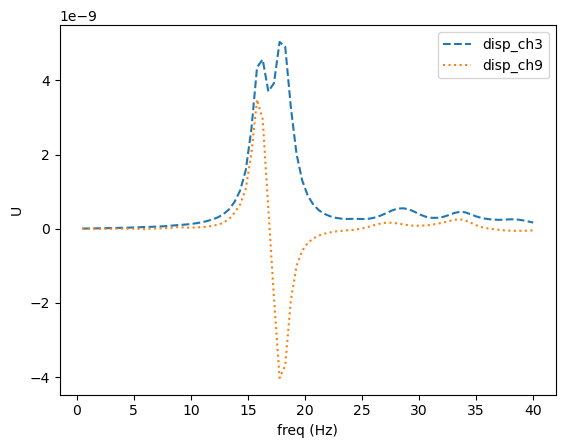

In [9]:

freq_values = meas_FRF['disp_ch3']['freq']
frf_ampl3 = meas_FRF['disp_ch3']['imag']
plt.plot(freq_values, frf_ampl3, label="disp_ch3",linestyle="--")

frf_ampl = meas_FRF['disp_ch9']['imag']
plt.plot(freq_values, frf_ampl, label="disp_ch9",linestyle=":")

plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("U")
plt.show()

5088


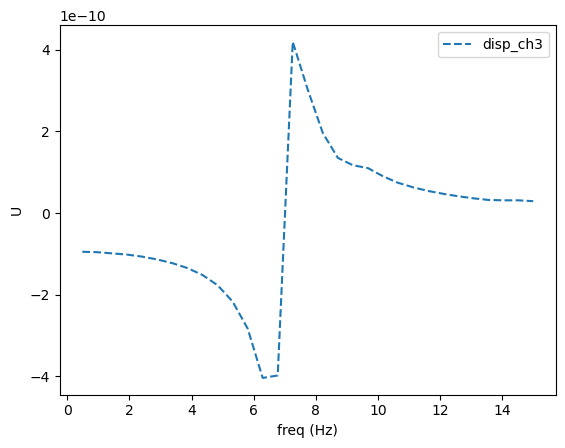

In [11]:

meas_id = simu_tk.get_node_num(11.387,7.2700, 2*simu_tk.height)

print(simu_tk.mapdl.queries.node(11.387, 7.2700,  6.7400))

FRF = simu_tk.get_node_disp(var_id=10,node_id= meas_id, direction='Z',var_name='MEAS')

freq_values = FRF['freq']
frf_ampl3 = FRF['ampl']
plt.plot(freq_values, frf_ampl3, label="disp_ch3",linestyle="--")



plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("U")
plt.show()


In [10]:
simu_tk.mapdl.clear()